## Import Dataset

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
from google.colab import files

import pandas as pd
import numpy as np
import statistics
import random as rand
import math

from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import norm


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [50]:
df_test = pd.read_csv("/content/drive/MyDrive/Dataset/kendaraan/kendaraan_test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/Dataset/kendaraan/kendaraan_train.csv")


In [51]:
# Menampilkan 5 Dataset Teratas

print(df_test.head())
print(df_train.head())

  Jenis_Kelamin  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan Tertarik
0        Wanita    49    1  ...               26                145        0
1          Pria    22    1  ...              152                241        0
2          Pria    24    1  ...              152                 62        0
3          Pria    46    1  ...              124                 34        0
4          Pria    35    1  ...              152                229        0

[5 rows x 11 columns]
   id Jenis_Kelamin  Umur  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0   1        Wanita  30.0  ...            152.0               97.0         0
1   2          Pria  48.0  ...             29.0              158.0         0
2   3           NaN  21.0  ...            160.0              119.0         0
3   4        Wanita  58.0  ...            124.0               63.0         0
4   5          Pria  50.0  ...             88.0              194.0         0

[5 rows x 12 columns]


## Data Exploration


In [52]:
# Menampilkan 10 Data train teratas
df_train.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [53]:
# Menampilkan ukuran dataframe

print(df_test.shape)
print(df_train.shape)

(47639, 11)
(285831, 12)


In [54]:
# Menampilkan info dataset 

print(df_test.info())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id         

In [55]:
# Menampilkan Deskripsi Dataset

print(df_test.describe())
print(df_train.describe())

               Umur           SIM  ...  Lama_Berlangganan      Tertarik
count  47639.000000  47639.000000  ...       47639.000000  47639.000000
mean      38.815466      0.997922  ...         154.447574      0.123029
std       15.548817      0.045540  ...          83.642137      0.328474
min       20.000000      0.000000  ...          10.000000      0.000000
25%       25.000000      1.000000  ...          82.000000      0.000000
50%       36.000000      1.000000  ...         155.000000      0.000000
75%       49.000000      1.000000  ...         227.000000      0.000000
max       85.000000      1.000000  ...         299.000000      1.000000

[8 rows x 8 columns]
                  id           Umur  ...  Lama_Berlangganan       Tertarik
count  285831.000000  271617.000000  ...      271839.000000  285831.000000
mean   142916.000000      38.844336  ...         154.286302       0.122471
std     82512.446734      15.522487  ...          83.694910       0.327830
min         1.000000      20.0

## Distribution


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


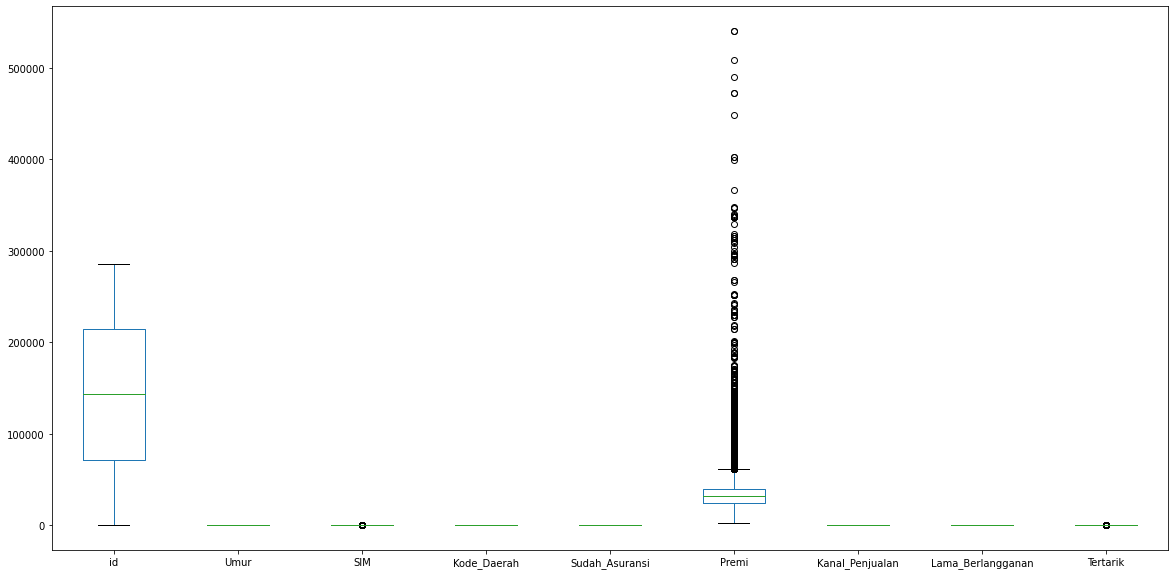

In [56]:
df_train.plot(kind='box', figsize=(20,10) )

## Data Pre-Processing


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


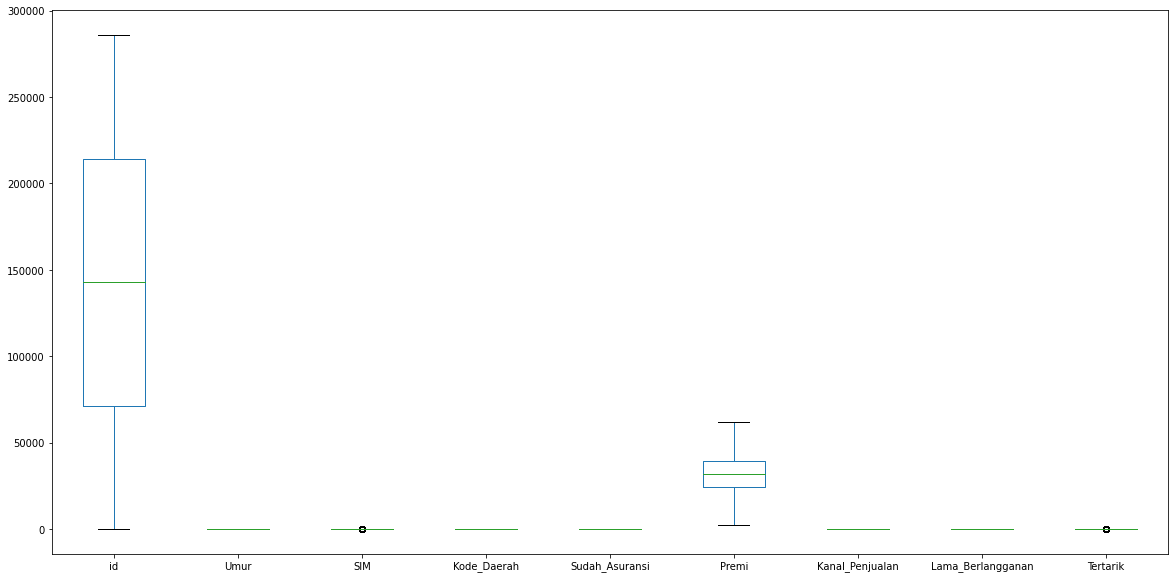

In [57]:
# handling Outlier Premi

q1 = df_train['Premi'].quantile(0.25)
q3 = df_train['Premi'].quantile(0.75)
iqr = q3 - q1

lbound = q1 - (iqr * 1.5)
ubound = q3 + (iqr * 1.5)

df_train['Premi'] = df_train['Premi'].apply(lambda x: ubound if x > ubound else lbound if x < lbound else x)


df_train.plot(kind='box', figsize=(20,10) )

In [58]:
# Replace Umur_Kendaraan to Integer
df_train.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2],inplace=True)

# Replace Jenis Kelamin to Integer
df_train.replace(['Wanita', 'Pria'],[0,1],inplace=True)

# Replace Kendaraan_Rusak to Integer
df_train.replace(['Tidak', 'Pernah'],[0,1],inplace=True)

print(df_train['Umur_Kendaraan'])
print(df_train['Jenis_Kelamin'])
print(df_train['Kendaraan_Rusak'])

0         0.0
1         2.0
2         0.0
3         1.0
4         2.0
         ... 
285826    0.0
285827    0.0
285828    0.0
285829    1.0
285830    1.0
Name: Umur_Kendaraan, Length: 285831, dtype: float64
0         0.0
1         1.0
2         NaN
3         0.0
4         1.0
         ... 
285826    0.0
285827    0.0
285828    0.0
285829    1.0
285830    1.0
Name: Jenis_Kelamin, Length: 285831, dtype: float64
0         0.0
1         1.0
2         0.0
3         0.0
4         NaN
         ... 
285826    0.0
285827    0.0
285828    0.0
285829    0.0
285830    1.0
Name: Kendaraan_Rusak, Length: 285831, dtype: float64


In [59]:
# Count Missing Value

print(df_train.isnull().sum())

# Fill Missing Value

df_train['Jenis_Kelamin'].fillna(rand.randrange(1), inplace=True)
df_train['Umur_Kendaraan'].fillna(rand.randrange(3), inplace=True)
df_train['Kendaraan_Rusak'].fillna(rand.randrange(1), inplace=True)
df_train.fillna(df_train.mean().round(), inplace=True)


print(df_train.isnull().sum())

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64
id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [60]:
# drop columns 
df_train.drop(['id'], inplace=True, axis=1)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,0.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,0.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,0.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,0.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [48]:
# Export Dataframe yang sudah dilakukan Pre-Processing 

df_train.to_csv('kendaraan_preprocessed.csv', index=False)
files.download('kendaraan_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Correlation 

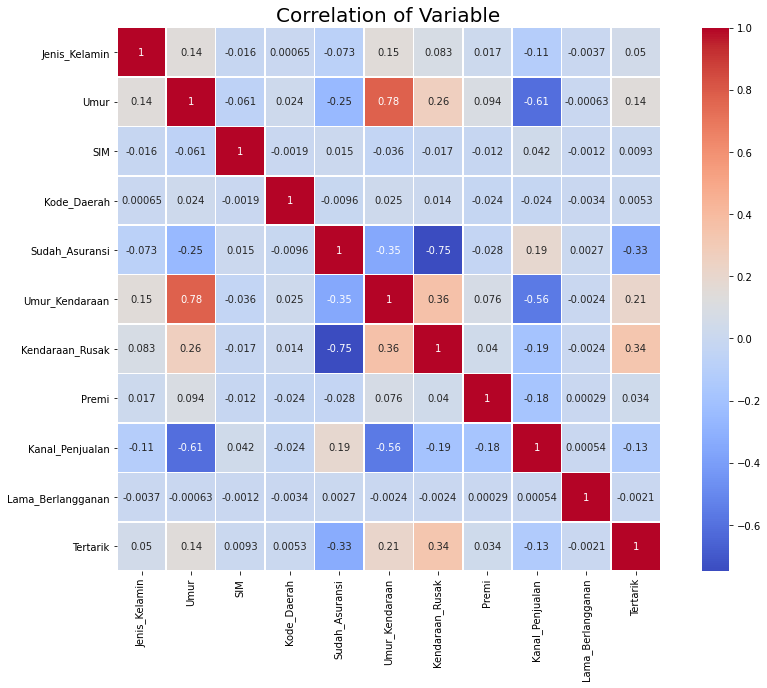

In [61]:
# Menampilkan Corelasi setiap variabel
plt.figure(figsize=(15,10))
plt.title('Correlation of Variable', y=1, size=20)

sns.heatmap(df_train.corr(method='spearman'), annot=True, linewidths=.5, square=True, cmap=plt.cm.coolwarm)

plt.show()

In [62]:
df_train.corr()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,0.133356,-0.016480,0.001570,-0.072550,0.145482,0.082782,0.003205,-0.103186,-0.003482,0.050158
Umur,0.133356,1.000000,-0.075199,0.041417,-0.237190,0.719474,0.249136,0.060598,-0.548758,0.000141,0.107145
SIM,-0.016480,-0.075199,1.000000,-0.003150,0.015248,-0.034404,-0.017034,-0.011222,0.041133,-0.001200,0.009341
Kode_Daerah,0.001570,0.041417,-0.003150,1.000000,-0.022602,0.040824,0.026040,-0.010658,-0.041020,-0.003437,0.009939
Sudah_Asuransi,-0.072550,-0.237190,0.015248,-0.022602,1.000000,-0.349443,-0.748777,0.007439,0.206096,0.002666,-0.326014
Umur_Kendaraan,0.145482,0.719474,-0.034404,0.040824,-0.349443,1.000000,0.363238,0.033331,-0.516375,-0.002209,0.213454
Kendaraan_Rusak,0.082782,0.249136,-0.017034,0.026040,-0.748777,0.363238,1.000000,0.006678,-0.209337,-0.002358,0.337156
Premi,0.003205,0.060598,-0.011222,-0.010658,0.007439,0.033331,0.006678,1.000000,-0.110767,-0.000373,0.022669
Kanal_Penjualan,-0.103186,-0.548758,0.041133,-0.041020,0.206096,-0.516375,-0.209337,-0.110767,1.000000,0.000311,-0.137412
Lama_Berlangganan,-0.003482,0.000141,-0.001200,-0.003437,0.002666,-0.002209,-0.002358,-0.000373,0.000311,1.000000,-0.002170


In [63]:
# Mengambil Feature dengan nilai korelasi paling tinggi antar feature

def selectCorr(data, corr_min):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i) :
            if (corr_matrix.iloc[i, j]) > corr_min:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [64]:
corr_feature = selectCorr(df_train, 0.05)
corr_feature

{'Kanal_Penjualan',
 'Kendaraan_Rusak',
 'Premi',
 'Tertarik',
 'Umur',
 'Umur_Kendaraan'}

In [65]:
# Drop Feature dengan nilai korelasi yang tinggi antar feature 

df_train = df_train.drop(corr_feature, axis=1)

In [66]:
df_train

,Jenis_Kelamin,SIM,Kode_Daerah,Sudah_Asuransi,Lama_Berlangganan
0,0.0,1.0,33.0,1.0,97.0
1,1.0,1.0,39.0,0.0,158.0
2,0.0,1.0,46.0,1.0,119.0
3,0.0,1.0,48.0,0.0,63.0
4,1.0,1.0,35.0,0.0,194.0
...,...,...,...,...,...
285826,0.0,1.0,4.0,1.0,217.0
285827,0.0,1.0,46.0,1.0,50.0
285828,0.0,1.0,50.0,1.0,226.0
285829,1.0,1.0,7.0,1.0,270.0


In [67]:
# Drop Feature yang mengandung data 0 atau 1
df_train.drop(columns=df_train.columns[((df_train == 1).mean() > 0.1)], axis=1, inplace=True)
df_train

,Kode_Daerah,Lama_Berlangganan
0,33.0,97.0
1,39.0,158.0
2,46.0,119.0
3,48.0,63.0
4,35.0,194.0
...,...,...
285826,4.0,217.0
285827,46.0,50.0
285828,50.0,226.0
285829,7.0,270.0


## Scalling 



In [68]:
# Mengkonversi data menjadi rentang 0 sampai 1
scaller = MinMaxScaler()

df_train = pd.DataFrame(scaller.fit_transform(df_train))
df_train.columns = ['Kode_Daerah', 'Lama_Berlangganan']
df_train



,Kode_Daerah,Lama_Berlangganan
0,0.634615,0.301038
1,0.750000,0.512111
2,0.884615,0.377163
3,0.923077,0.183391
4,0.673077,0.636678
...,...,...
285826,0.076923,0.716263
285827,0.884615,0.138408
285828,0.961538,0.747405
285829,0.134615,0.899654


In [69]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Kode_Daerah,285831.0,0.507406,0.248406,0.0,0.288462,0.538462,0.673077,1.0
Lama_Berlangganan,285831.0,0.499212,0.282425,0.0,0.259516,0.498270,0.737024,1.0


## KMeans


In [70]:
# Model Clustering Menggunakan KMeans

class K_Means:

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def init_centroids(self, X):                                                 # Inisialisasi awal centroid
        np.random.RandomState(self.random_state)                                 
        rand = np.random.permutation(X.shape[0])
        centroids = X[rand[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):                                      # Mengacak letak centroid di satu cluster
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):                                    # Menghitung jarak antar data ke centroid
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def close_cluster(self, distance):                                           # Mendapatkan nilai cluster terdekat berdasarkan jarak
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):                                 # Menghitung nilai sum squered error untuk menghitung jarak centroid antar cluster
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):                                                            # generate Model KMeans
        self.centroids = self.init_centroids(X)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers = X[initial]
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.close_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            indices = [[i for i, l in enumerate(self.labels) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            self.cluster_centers = [c.sum(axis=0) / len(c) for c in X_by_cluster]
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        self.inertia = sum(((self.cluster_centers[l] - x)**2).sum()
                            for x, l in zip(X, self.labels))
        return self
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.close_cluster(distance)

Text(0.5, 1.0, 'Cluster data')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


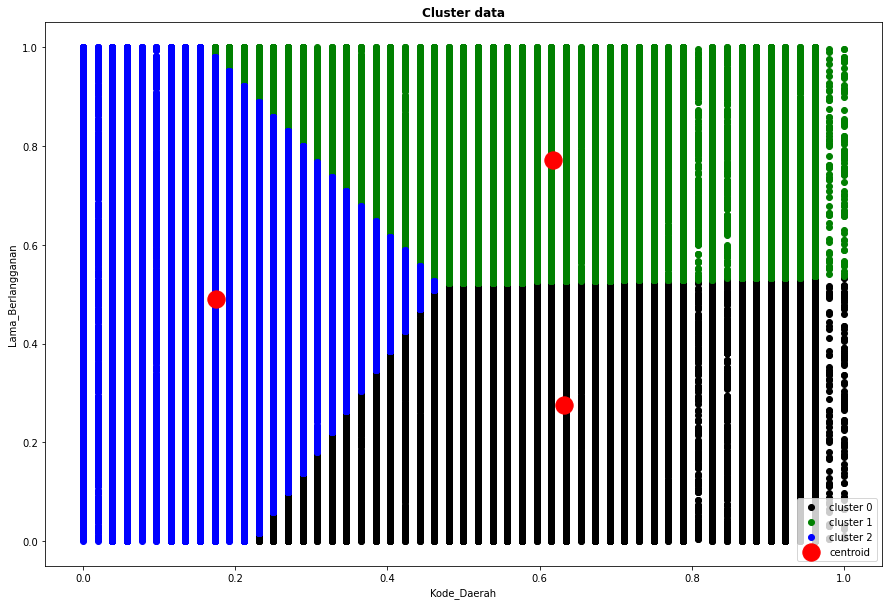

In [71]:
# Mengubah dataframe ke array
X = np.array(df_train)

K = 3
km = K_Means(n_clusters=K, max_iter=100)
km.fit(X)
centroids = km.centroids

colors = ['black', 'green', 'blue', 'yellow', 'purple', 'grey']

# Plot Cluster
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(K):
    
    plt.scatter(X[km.labels == i, 0], X[km.labels == i, 1],
                c=colors[i], label=('cluster '+str(i)))
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300,
                c='r', label='centroid')



plt.legend()
plt.xlabel(df_train.columns[0])
plt.ylabel(df_train.columns[1])
plt.title('Cluster data', fontweight='bold')


## Elbow Method

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


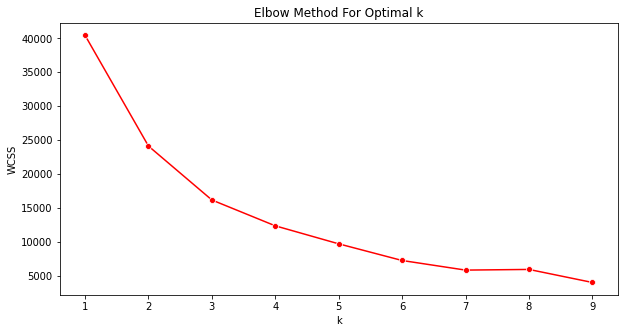

In [72]:
wcss = []
K = list(range(1,10))
for k in K:
    kmeans = K_Means(n_clusters = k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia)
plt.figure(figsize=(10,5))
sns.lineplot(K, wcss, marker='o', color='red')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

## Eksperimen


### Case 1 : Menggunakan Feature Kode Daerah dan Lama Berlangganan

In [73]:
df_test = pd.read_csv("/content/drive/MyDrive/Dataset/kendaraan/kendaraan_test.csv")
# handling Outlier Premi

q1 = df_test['Premi'].quantile(0.25)
q3 = df_test['Premi'].quantile(0.75)
iqr = q3 - q1

lbound = q1 - (iqr * 1.5)
ubound = q3 + (iqr * 1.5)

df_test['Premi'] = df_test['Premi'].apply(lambda x: ubound if x > ubound else lbound if x < lbound else x)
# Replace data object type
df_test.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2],inplace=True)
df_test.replace(['Wanita', 'Pria'],[0,1],inplace=True)
df_test.replace(['Tidak', 'Pernah'],[0,1],inplace=True)




Text(0.5, 1.0, 'Cluster data')

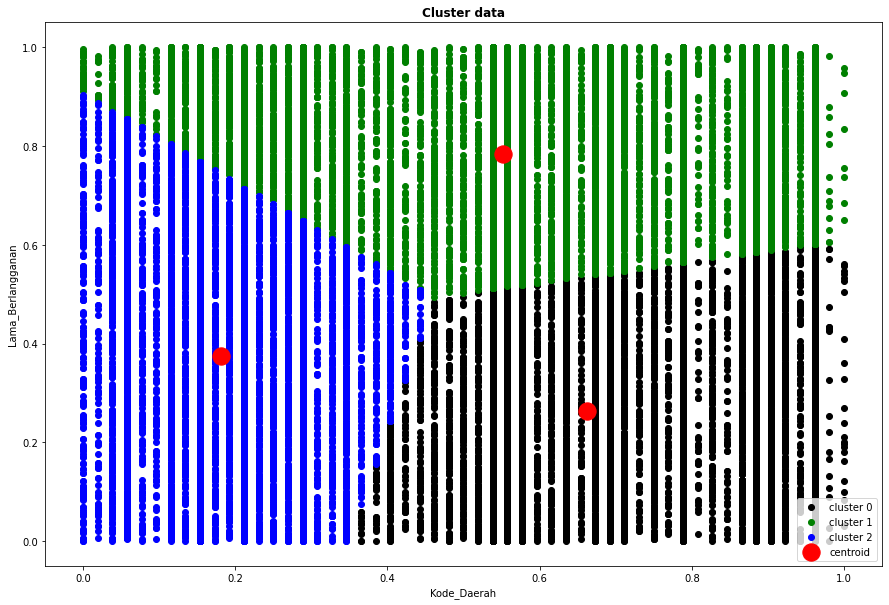

In [74]:
# Feature Selection 
df_test = df_test[['Kode_Daerah', 'Lama_Berlangganan']]

# Scaling
scaller = MinMaxScaler()
df_test = pd.DataFrame(scaller.fit_transform(df_test))
df_test.columns = ['Kode_Daerah', 'Lama_Berlangganan']

# Generate Model K_Means
X = np.array(df_test)

K = 3
km = K_Means(n_clusters=K, max_iter=100)
km.fit(X)
centroids = km.centroids

colors = ['black', 'green', 'blue', 'yellow', 'purple', 'grey']

# Plot Cluster
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(K):
    
    plt.scatter(X[km.labels == i, 0], X[km.labels == i, 1],
                c=colors[i], label=('cluster '+str(i)))
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300,
                c='r', label='centroid')



plt.legend()
plt.xlabel(df_test.columns[0])
plt.ylabel(df_test.columns[1])
plt.title('Cluster data', fontweight='bold')



[7066.228288761289, 4070.3653421773392, 2738.846020013031, 2288.121626083662, 1723.839392911095, 1211.2613477752088, 963.5476472692567, 922.052949590097, 709.4964990787779]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


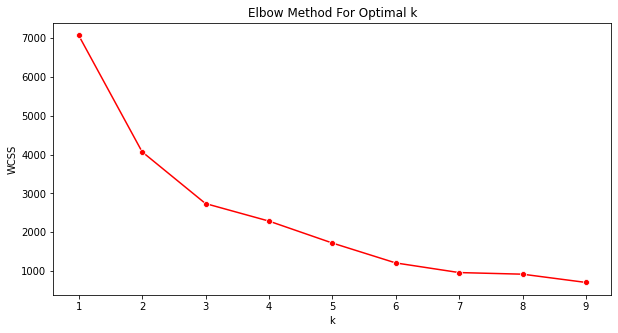

In [75]:
wcss = []
K = list(range(1,10))
for k in K:
    kmeans = K_Means(n_clusters = k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia)
print(wcss)
plt.figure(figsize=(10,5))
sns.lineplot(K, wcss, marker='o', color='red')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

### Case 2 : Menggunakan Feature Premi dan Lama Berlangganan

In [76]:
df_test = pd.read_csv("/content/drive/MyDrive/Dataset/kendaraan/kendaraan_test.csv")
# handling Outlier Premi

q1 = df_test['Premi'].quantile(0.25)
q3 = df_test['Premi'].quantile(0.75)
iqr = q3 - q1

lbound = q1 - (iqr * 1.5)
ubound = q3 + (iqr * 1.5)

df_test['Premi'] = df_test['Premi'].apply(lambda x: ubound if x > ubound else lbound if x < lbound else x)
# Replace data object type
df_test.replace(['< 1 Tahun','1-2 Tahun', '> 2 Tahun'],[0,1,2],inplace=True)
df_test.replace(['Wanita', 'Pria'],[0,1],inplace=True)
df_test.replace(['Tidak', 'Pernah'],[0,1],inplace=True)


Text(0.5, 1.0, 'Cluster data')

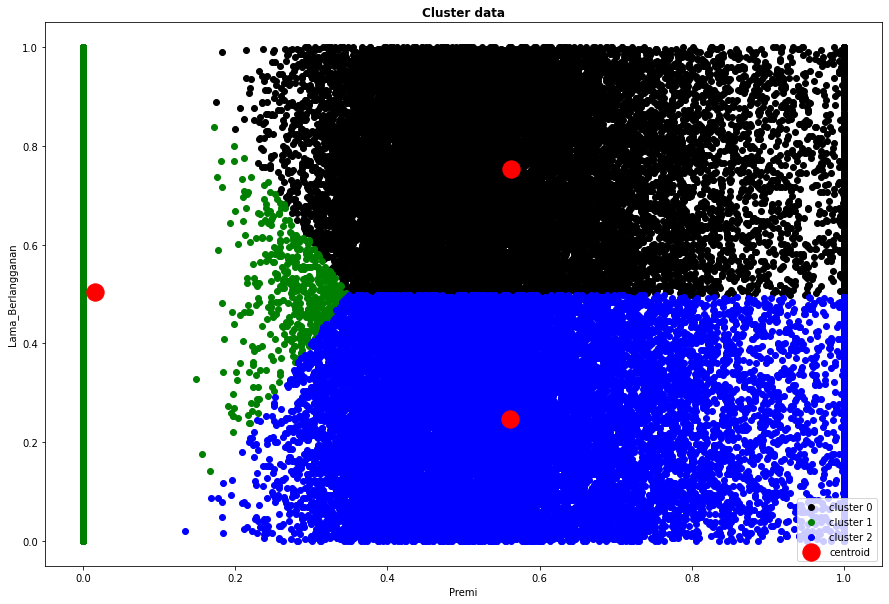

In [77]:
# Feature Selection 
df_test = df_test[['Premi','Lama_Berlangganan']]

# Scaling
scaller = MinMaxScaler()
df_test = pd.DataFrame(scaller.fit_transform(df_test))
df_test.columns = ['Premi','Lama_Berlangganan']

# Generate Model K_Means
X = np.array(df_test)

K = 3
km = K_Means(n_clusters=K, max_iter=100)
km.fit(X)
centroids = km.centroids

colors = ['black', 'green', 'blue', 'yellow', 'purple', 'grey']

# Plot Cluster
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(K):
    
    plt.scatter(X[km.labels == i, 0], X[km.labels == i, 1],
                c=colors[i], label=('cluster '+str(i)))
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300,
                c='r', label='centroid')



plt.legend()
plt.xlabel(df_test.columns[0])
plt.ylabel(df_test.columns[1])
plt.title('Cluster data', fontweight='bold')



[7228.488474100848, 4232.469912637369, 2636.758816958727, 2186.861976223493, 1664.6252297423484, 1291.0399134143734, 1024.4597148312557, 905.0391571176003, 810.0059453639454]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


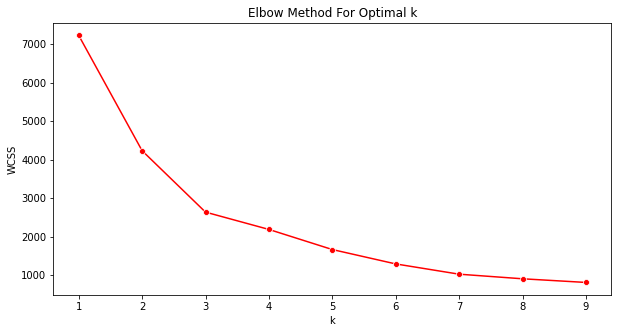

In [204]:
wcss = []
K = list(range(1,10))
for k in K:
    kmeans = K_Means(n_clusters = k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia)
print(wcss)
plt.figure(figsize=(10,5))
sns.lineplot(K, wcss, marker='o', color='red')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()